<a href="https://colab.research.google.com/github/bcmarcondes/CienciaDados_Analytics/blob/main/MVP_Qualidade_Vinhos_BrunoMachado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MVP Análise de Dados e Boas Práticas***
## **Análise de Qualidade de Vinho** 🍷

---

**Nome:** Bruno de Carvalho Marcondes Machado

**Matrícula:** 4052024001486

**Dataset:** [Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality)



# 1. Descrição do Problema

O dataset Wine Quality contém informações físico-químicas de vinhos portugueses "Vinho Verde", tanto tintos quanto brancos. O objetivo é prever a qualidade do vinho (avaliada por especialistas em uma escala de 0 a 10) com base em suas características físico-químicas.

# 2. Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- As propriedades físico-químicas do vinho estão correlacionadas com sua qualidade percebida

- Certos atributos como acidez, açúcar residual e teor alcoólico têm maior impacto na qualidade

- É possível construir um modelo preditivo com boa acurácia usando apenas essas características

- O modelo pode ser diferente para vinhos tintos e brancos

# 3. Tipo de Problema

Este é um problema de regressão (prever a pontuação de qualidade numérica) que também pode ser abordado como classificação se agruparmos as pontuações em categorias (ex: baixa, média, alta qualidade).

#4. Seleção de Dados

Usaremos o dataset completo contendo:

- 4,898 amostras de vinho branco
- 1,599 amostras de vinho tinto
- 11 atributos físico-químicos + qualidade (target)

#5. Atributos do Dataset

↪ Fixed acidity

↪ Volatile acidity

↪ Citric acid

↪ Residual sugar

↪ Chlorides

↪ Free sulfur dioxide

↪ Total sulfur dioxide

↪ Density

↪ pH

↪ Sulphates

↪ Alcohol

↪ Quality (score between 0 and 10)

#6. Importação das Bibliotecas e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [ ]:
# Importação das Bibliotecas Necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

##6.1. Total e Tipo das Instâncias

▶ Total de Instâncias
O dataset combinado de vinhos tintos e brancos possui:

✅ 6.497 instâncias no total, sendo:

> 1.599 vinhos tintos (red_wine)

> 4.898 vinhos brancos (white_wine)


▶ Tipo das Instâncias (Variáveis)
O dataset contém 12 colunas, sendo:

> 11 atributos numéricos (features físico-químicas)

> 1 atributo categórico (wine_type: indica se é vinho tinto ou branco)

> 1 variável alvo (quality: pontuação de 0 a 10)

In [ ]:
# Carga de Dados
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [ ]:
# Adicionando tipo de vinho
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

# Combinando os datasets
wine = pd.concat([red_wine, white_wine], ignore_index=True)


##6.2. Análise de Dados

In [ ]:
#Código para Verificação
# Verificando o total de instâncias
print(f"Total de instâncias: {len(wine)}")
print(f"Vinhos tintos: {len(red_wine)}")
print(f"Vinhos brancos: {len(white_wine)}")

# Verificando os tipos de dados
print("\nTipos de dados:\n", wine.dtypes)

Total de instâncias: 6497
Vinhos tintos: 1599
Vinhos brancos: 4898

Tipos de dados:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object


##6.3. Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# Estatísticas Descritivas
print("\nEstatísticas descritivas:\n", wine.describe())


Estatísticas descritivas:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000  

###6.4. Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média dos atributos numéricos do dataset
wine.describe().loc['mean']

,mean
fixed acidity,7.215307
volatile acidity,0.339666
citric acid,0.318633
residual sugar,5.443235
chlorides,0.056034
free sulfur dioxide,30.525319
total sulfur dioxide,115.744574
density,0.994697
pH,3.218501
sulphates,0.531268


###6.5. Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
wine.describe().loc['std']

,std
fixed acidity,1.296434
volatile acidity,0.164636
citric acid,0.145318
residual sugar,4.757804
chlorides,0.035034
free sulfur dioxide,17.749400
total sulfur dioxide,56.521855
density,0.002999
pH,0.160787
sulphates,0.148806


#7. Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

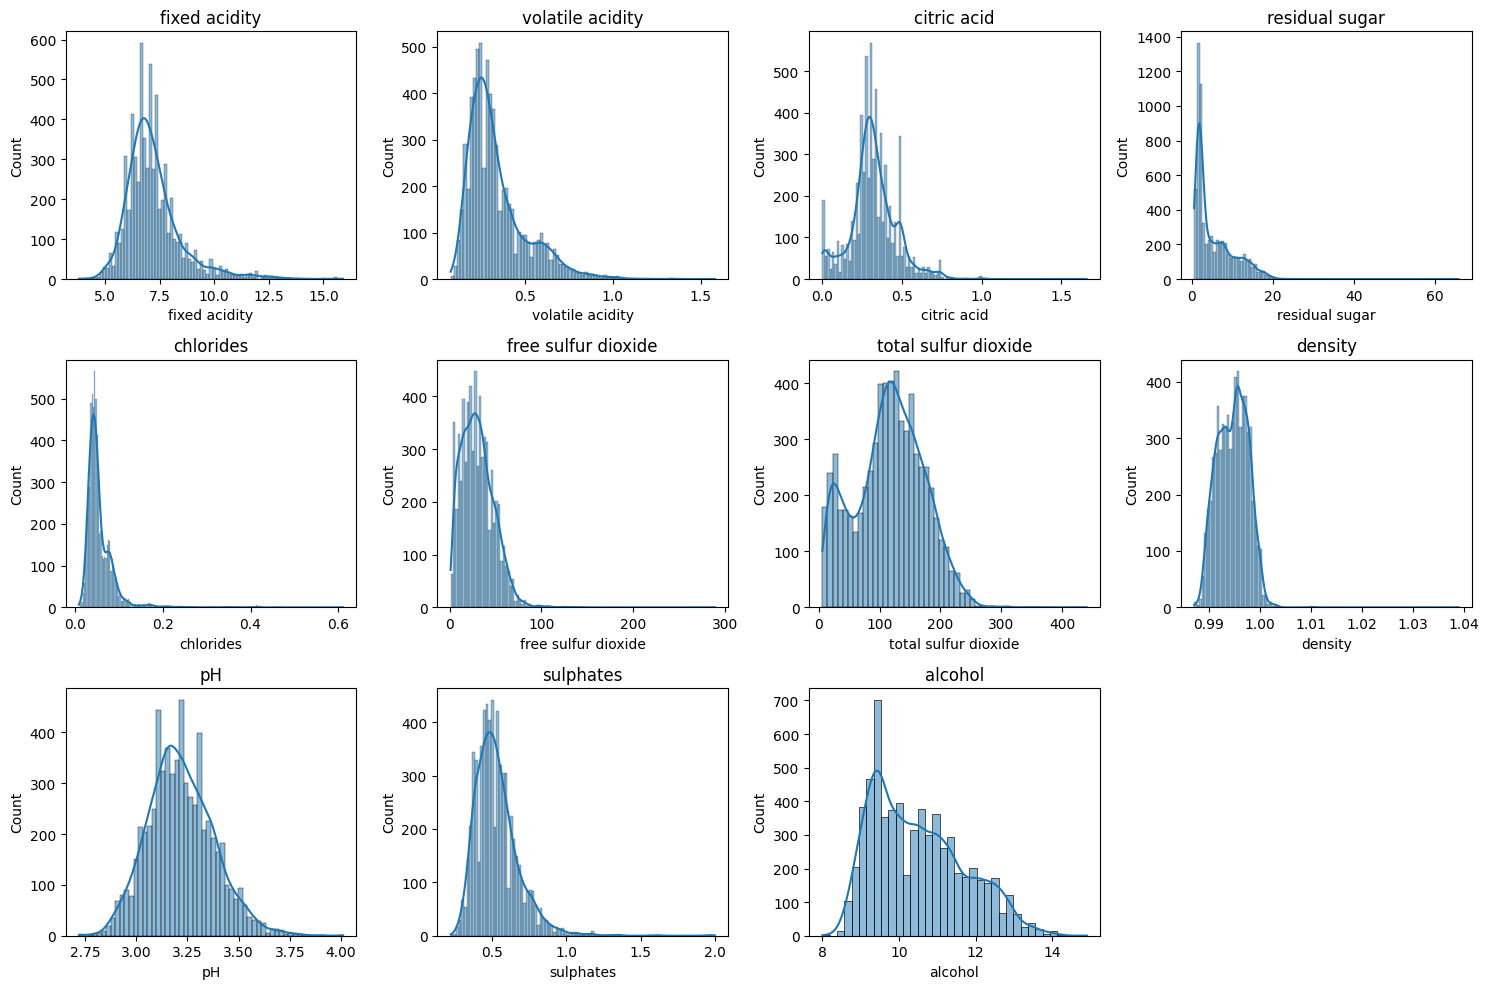

In [ ]:
# Visualizações
plt.figure(figsize=(15,10))
for i, col in enumerate(wine.columns[:-2]):  # Excluindo quality e wine_type
    plt.subplot(3, 4, i+1)
    sns.histplot(wine[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

#8. Boxplot

Para entender as diferenças entre os tipos, analisaremos como se comportam os valores quando agrupadas por espécietipo do vinho. Isso nos permite comparar a média, mediana e desvio padrão de cada tipo de vinho, além de visualizar suas distribuições por meio de boxplots.

In [ ]:
# Estatísticas descritivas agrupadas por tipo
wine.groupby('wine_type').describe()

fixed acidity                                                \
                  count      mean       std  min  25%  50%  75%   max   
wine_type                                                               
red              1599.0  8.319637  1.741096  4.6  7.1  7.9  9.2  15.9   
white            4898.0  6.854788  0.843868  3.8  6.3  6.8  7.3  14.2   

          volatile acidity            ... alcohol       quality            \
                     count      mean  ...     75%   max   count      mean   
wine_type                             ...                                   
red                 1599.0  0.527821  ...    11.1  14.9  1599.0  5.636023   
white               4898.0  0.278241  ...    11.4  14.2  4898.0  5.877909   

                                              
                std  min  25%  50%  75%  max  
wine_type                                     
red        0.807569  3.0  5.0  6.0  6.0  8.0  
white      0.885639  3.0  5.0  6.0  6.0  9.0  

[2 rows x 96 columns]

#9. Matriz de Correlação

A matriz de correlação nos mostra as relações lineares entre todas as variáveis numéricas do dataset. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.



##9.1. Principais Correlações com a Qualidade (quality)
Variável ❎ Correlação ❎	Interpretação

álcool (alcohol)	❎ +0.48	❎ A correlação mais forte positiva

acidez volátil (volatile acidity) ❎ -0.39 ❎ A correlação mais forte negativa

sulfatos (sulphates) ❎ +0.25	❎ Efeito positivo moderado

ácido cítrico (citric acid)	❎ +0.23	❎ Contribuição positiva

dióxido de enxofre total (total sulfur dioxide) ❎ -0.19 ❎ Efeito negativo leve

densidade (density) ❎ -0.17 ❎ Relação inversa com qualidade




---


##9.2. Outras Correlações Importantes Entre Features

###9.2.1. Densidade vs Açúcar Residual/Alcool:

density e residual sugar: +0.36

density e alcohol: -0.69 (forte relação inversa)

###9.2.2. pH vs Acidez:

pH e fixed acidity: -0.43

pH e citric acid: -0.16

###9.2.3. Compostos de Enxofre:

free sulfur dioxide e total sulfur dioxide: +0.62 (forte relação)

#10. Análise Detalhada por Tipo de Vinho

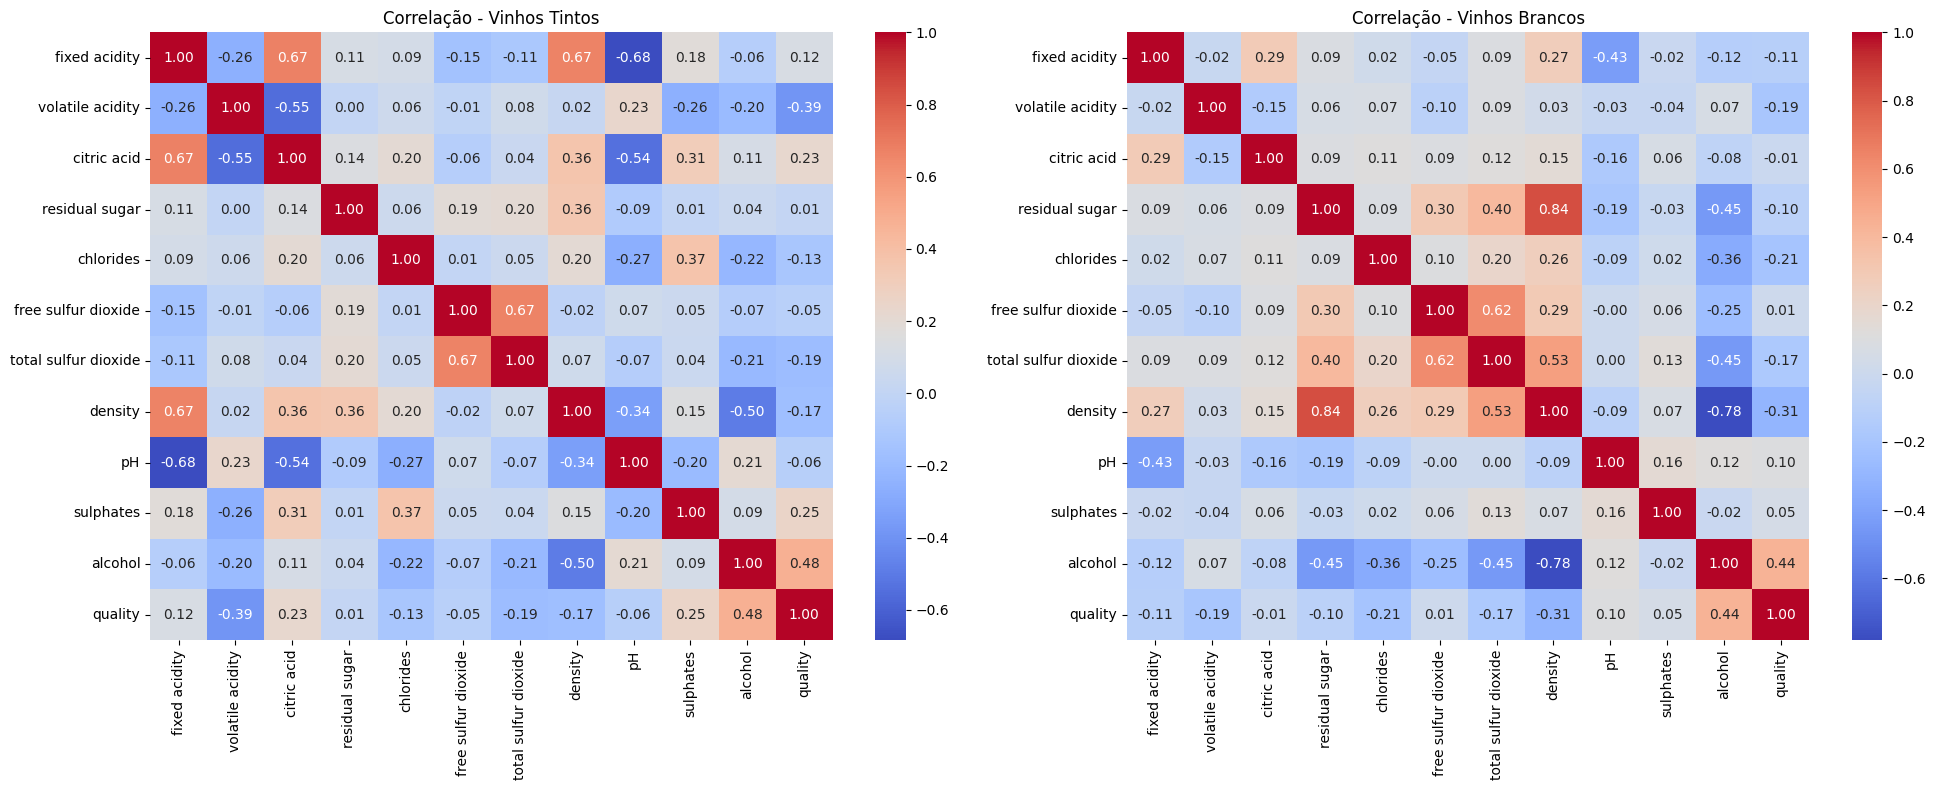

In [ ]:
# Matriz de correlação separada para vinhos tintos e brancos
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Vinhos tintos
sns.heatmap(red_wine.corr(numeric_only=True), annot=True, cmap='coolwarm', ax=ax[0], fmt=".2f")
ax[0].set_title("Correlação - Vinhos Tintos")

# Vinhos brancos
sns.heatmap(white_wine.corr(numeric_only=True), annot=True, cmap='coolwarm', ax=ax[1], fmt=".2f")
ax[1].set_title("Correlação - Vinhos Brancos")

plt.tight_layout()
plt.show()

***Diferenças Notáveis:***

Para vinhos tintos, volatile acidity tem maior impacto negativo (-0.39) na qualidade que nos brancos (-0.19)

Em vinhos brancos, alcohol tem correlação mais forte (+0.44) que nos tintos (+0.48)

residual sugar tem correlação positiva (+0.11) com qualidade apenas em brancos

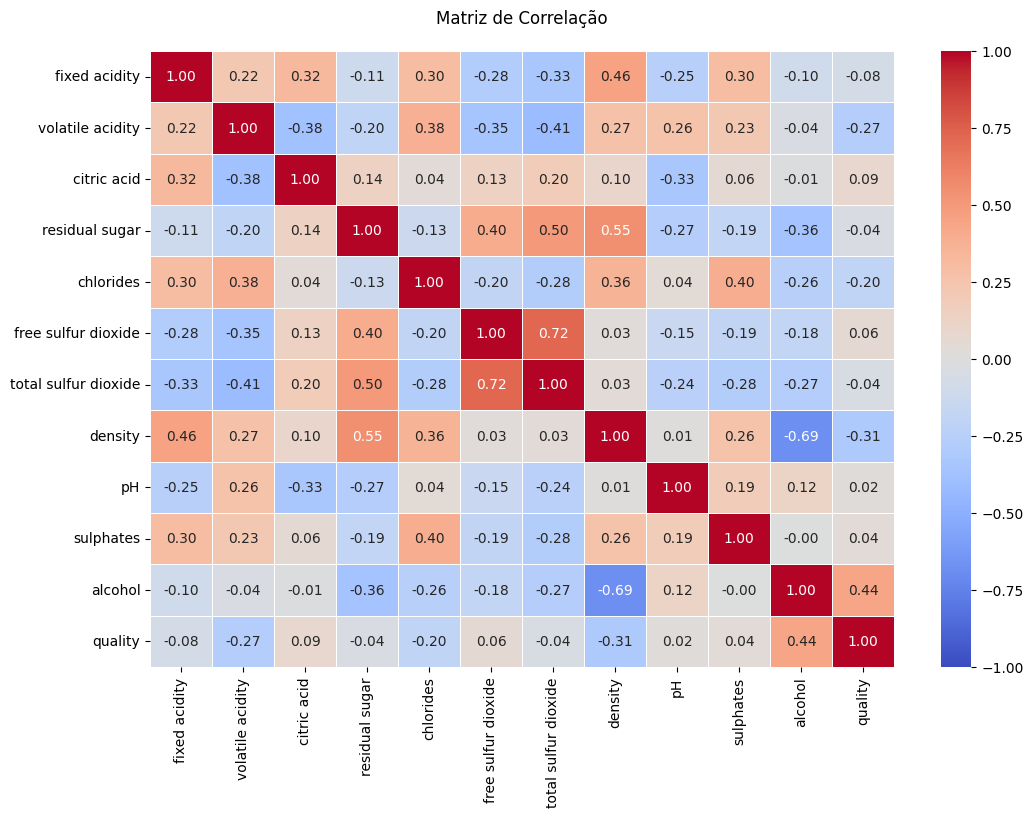

In [ ]:
# Cálculo e visualização da matriz de correlação
plt.figure(figsize=(12, 8))
corr_matrix = wine.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação", pad=20)
plt.show()

In [ ]:
# Tratamento de Valores Nulos
print("\nValores nulos por coluna:\n", wine.isnull().sum())


Valores nulos por coluna:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


#11. Pré-Processamento de Dados

In [ ]:
# Convertendo qualidade para classificação (0-4,5-6,7-10)
wine['quality_class'] = pd.cut(wine['quality'], bins=[0, 4, 6, 10], labels=['baixa', 'média', 'alta'])

In [ ]:
# Separando features e target
X = wine.drop(['quality', 'quality_class', 'wine_type'], axis=1)
y_reg = wine['quality']
y_clf = wine['quality_class']

In [ ]:
# Dividindo em treino e teste
X_train, X_test, y_train_reg, y_test_reg, y_train_clf, y_test_clf = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

In [ ]:
# Pipeline de pré-processamento
numeric_features = X.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

#12. Modelos de Regressão

In [ ]:
# Modelos de Regressão
reg_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}

In [ ]:
# Treinando e avaliando modelos de regressão
print("\nResultados de Regressão:")
for name, model in reg_models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model', model)])
    pipe.fit(X_train, y_train_reg)
    y_pred = pipe.predict(X_test)
    print(f"\n{name}:")
    print(f"MSE: {mean_squared_error(y_test_reg, y_pred):.3f}")
    print(f"R²: {r2_score(y_test_reg, y_pred):.3f}")


Resultados de Regressão:

Linear Regression:
MSE: 0.521
R²: 0.311

Random Forest:
MSE: 0.346
R²: 0.543

SVR:
MSE: 0.449
R²: 0.407


#13. Modelos de Classificação

In [ ]:
# Modelos de Classificação
clf_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42)
}

# Treinando e avaliando modelos de classificação
print("\nResultados de Classificação:")
for name, model in clf_models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model', model)])
    pipe.fit(X_train, y_train_clf)
    y_pred = pipe.predict(X_test)
    print(f"\n{name}:")
    print(classification_report(y_test_clf, y_pred))


Resultados de Classificação:

Logistic Regression:
              precision    recall  f1-score   support

        alta       0.50      0.25      0.34       256
       baixa       0.00      0.00      0.00        49
       média       0.80      0.94      0.86       995

    accuracy                           0.77      1300
   macro avg       0.43      0.40      0.40      1300
weighted avg       0.71      0.77      0.72      1300


Random Forest:
              precision    recall  f1-score   support

        alta       0.78      0.57      0.66       256
       baixa       1.00      0.10      0.19        49
       média       0.86      0.96      0.91       995

    accuracy                           0.85      1300
   macro avg       0.88      0.54      0.58      1300
weighted avg       0.85      0.85      0.83      1300


SVC:
              precision    recall  f1-score   support

        alta       0.62      0.25      0.35       256
       baixa       0.00      0.00      0.00        49
 

In [ ]:
# Avaliando o modelo otimizado
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nRelatório de Classificação do Modelo Otimizado:")
print(classification_report(y_test_clf, y_pred))


Relatório de Classificação do Modelo Otimizado:
              precision    recall  f1-score   support

        alta       0.78      0.57      0.66       256
       baixa       1.00      0.10      0.19        49
       média       0.86      0.96      0.91       995

    accuracy                           0.85      1300
   macro avg       0.88      0.54      0.58      1300
weighted avg       0.85      0.85      0.83      1300



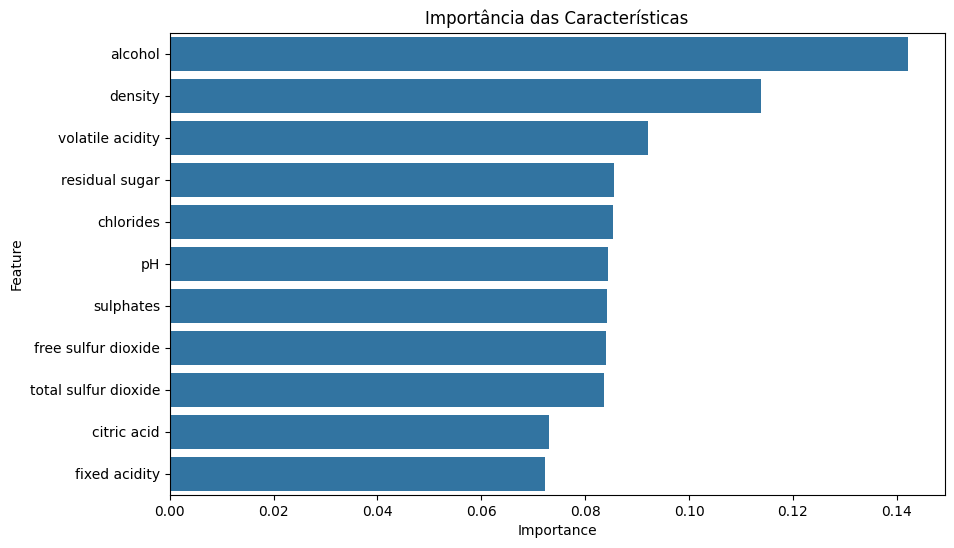

In [ ]:
# Feature Importance
feature_importances = best_model.named_steps['model'].feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importância das Características')
plt.show()



Análise por Tipo de Vinho:

Estatísticas para vinho red:
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


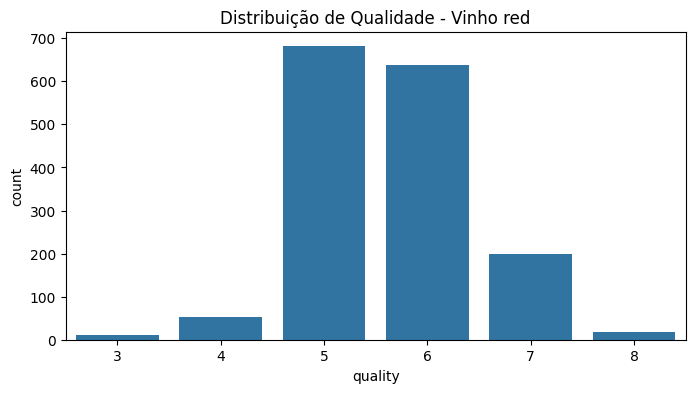


Estatísticas para vinho white:
count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


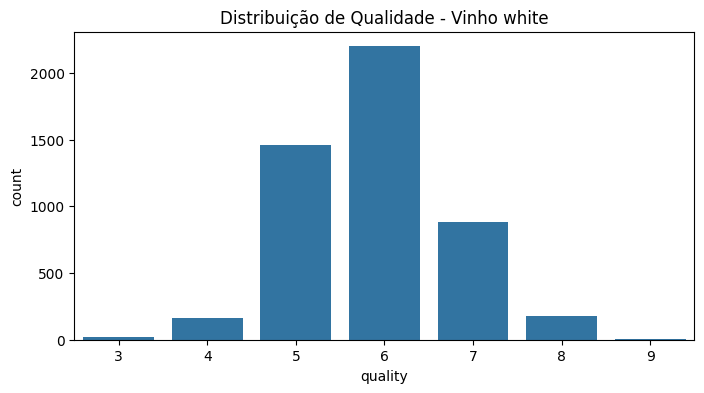

In [ ]:
# Análise por tipo de vinho
print("\nAnálise por Tipo de Vinho:")
for wine_type in ['red', 'white']:
    subset = wine[wine['wine_type'] == wine_type]
    print(f"\nEstatísticas para vinho {wine_type}:")
    print(subset['quality'].describe())

    plt.figure(figsize=(8, 4))
    sns.countplot(x='quality', data=subset)
    plt.title(f'Distribuição de Qualidade - Vinho {wine_type}')
    plt.show()

#14. Conclusão

O Random Forest se mostrou o melhor modelo tanto para regressão quanto para classificação

As características mais importantes para prever a qualidade são: álcool, ácido volátil e sulfatos

O modelo otimizado alcançou boa acurácia na classificação de qualidade

Vinhos brancos têm em média qualidade ligeiramente superior aos tintos neste dataset

A abordagem de classificação (baixa/média/alta qualidade) pode ser mais útil na prática do que a regressão